In [7]:
import pickle
import matplotlib.pyplot as plt

In [8]:
with open('/home/rothermm/brain-diffuser/results/assessor_scores/subj01/emonet_vdvae_sub01.pkl', 'rb') as f:
    data = pickle.load(f)

In [9]:
data.keys()

dict_keys(['alpha_0', 'alpha_2', 'alpha_3', 'alpha_4', 'alpha_-2', 'alpha_-3', 'alpha_-4'])

In [10]:
alpha_0 = data["alpha_0"]

In [11]:
for key in data.keys():
    globals()[key] = data[key]

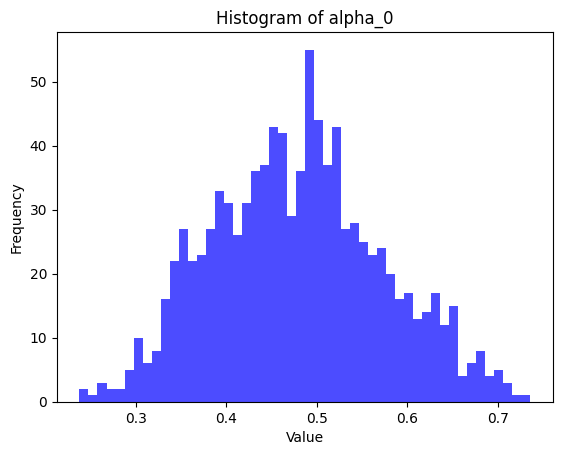

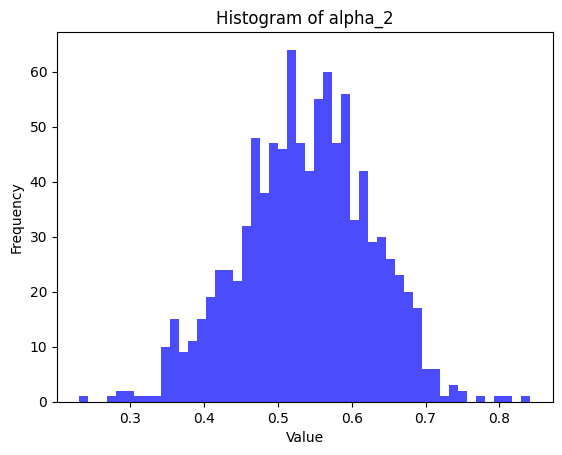

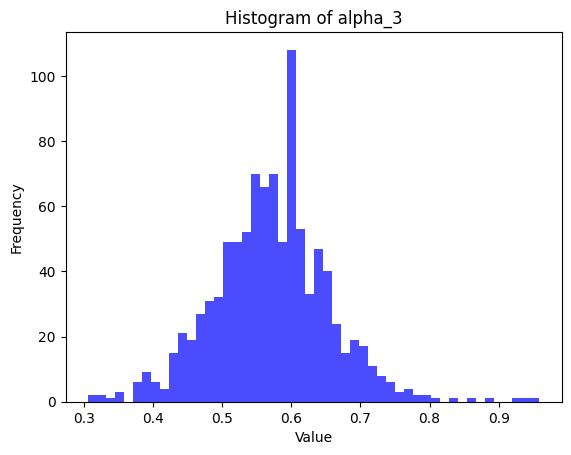

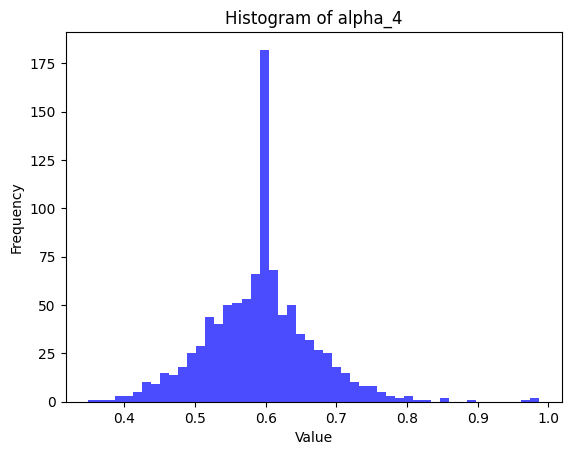

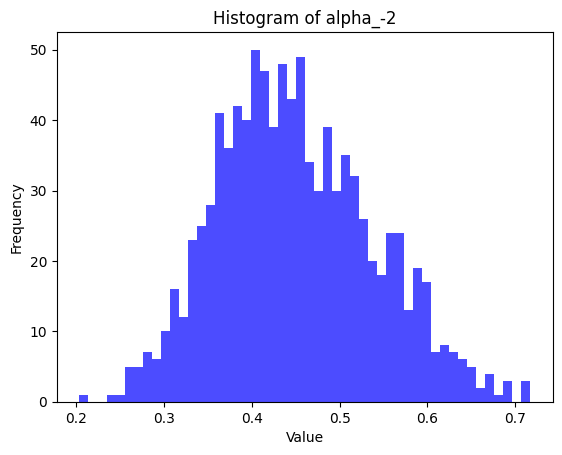

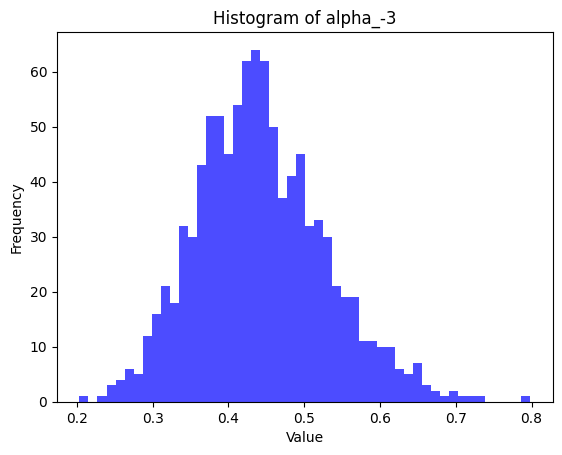

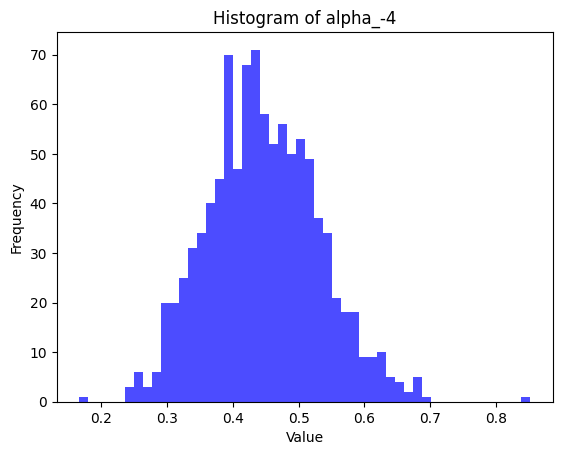

In [12]:
for key, values in data.items():
    if isinstance(values, (list, tuple, set)) or hasattr(values, '__iter__'):  # Check if the value is iterable
        plt.figure()
        plt.hist(values, bins=50, color='blue', alpha=0.7)
        plt.title(f'Histogram of {key}')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.show()

# normalized mean trends

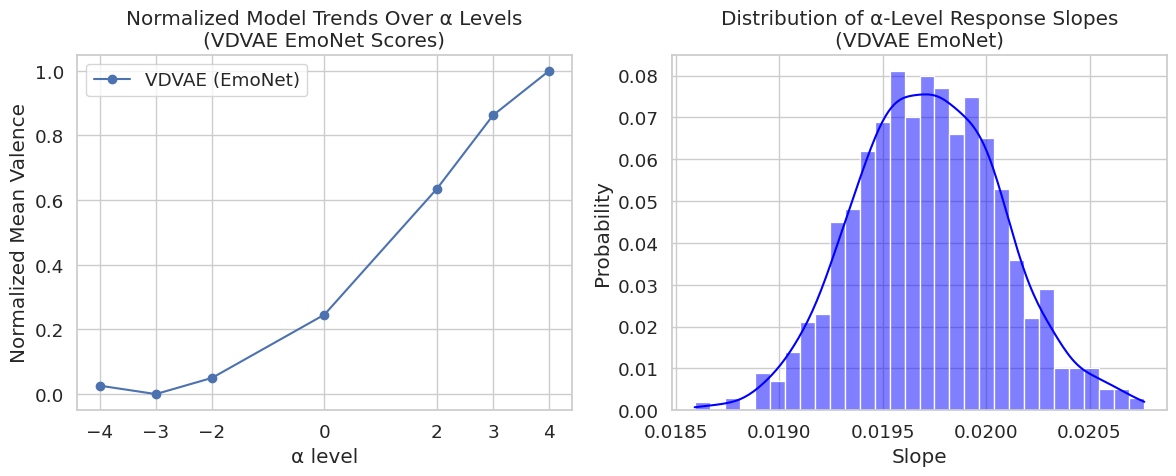

In [23]:
# Cell 1: Imports
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from sklearn.utils import resample

# Cell 2: Load model data
pkl_path = "/home/rothermm/brain-diffuser/results/assessor_scores/subj01/emonet_vdvae_sub01.pkl"
with open(pkl_path, "rb") as f:
    data = pickle.load(f)

# Cell 3: Prepare data
# Extract and sort alpha levels numerically
alpha_levels = sorted(data.keys(), key=lambda x: int(x.split('_')[1]))
alpha_numeric = [int(a.split('_')[1]) for a in alpha_levels]

# Stack valence scores into 2D array: rows = images, cols = alpha levels
valence_matrix = np.column_stack([np.array(data[a]) for a in alpha_levels])

# Cell 4: Panel A - Mean valence across images per alpha level
# Each column in valence_matrix corresponds to one alpha_level
mean_valence_per_alpha = valence_matrix.mean(axis=0)

# Min-max normalize
min_val, max_val = mean_valence_per_alpha.min(), mean_valence_per_alpha.max()
normalized_mean_valence = (mean_valence_per_alpha - min_val) / (max_val - min_val)

# Build DataFrame for plotting
mean_ratings = pd.DataFrame({
    'alpha_level': alpha_numeric,
    'NormalizedValence': normalized_mean_valence
})

# Cell 5: Panel B - Bootstrap slopes
n_bootstrap = 1000
slopes = []

for i in range(n_bootstrap):
    # Sample images (rows) with replacement
    boot_rows = resample(valence_matrix, replace=True, n_samples=valence_matrix.shape[0])
    
    # Compute mean valence per alpha level for bootstrap sample
    mean_boot = boot_rows.mean(axis=0)
    
    # Fit slope across alpha levels
    slope, _, _, _, _ = linregress(alpha_numeric, mean_boot)
    slopes.append(slope)

# Cell 6: Plotting
sns.set(style="whitegrid", font_scale=1.2)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Panel A: Normalized mean valence ratings
axes[0].plot(
    mean_ratings['alpha_level'],
    mean_ratings['NormalizedValence'],
    marker='o',
    linestyle='-',
    label='VDVAE (EmoNet)'
)
axes[0].set_title("Normalized Model Trends Over α Levels\n(VDVAE EmoNet Scores)")
axes[0].set_xlabel("α level")
axes[0].set_ylabel("Normalized Mean Valence")
axes[0].set_xticks(alpha_numeric)
axes[0].legend()

# Panel B: Bootstrap slope distribution
sns.histplot(slopes, kde=True, color='blue', bins=30, ax=axes[1], stat="probability")
axes[1].set_title("Distribution of α-Level Response Slopes\n(VDVAE EmoNet, Bootstrapped)")
axes[1].set_xlabel("Slope (Δvalence per α-unit)")
axes[1].set_ylabel("Probability")

plt.tight_layout()
plt.show()


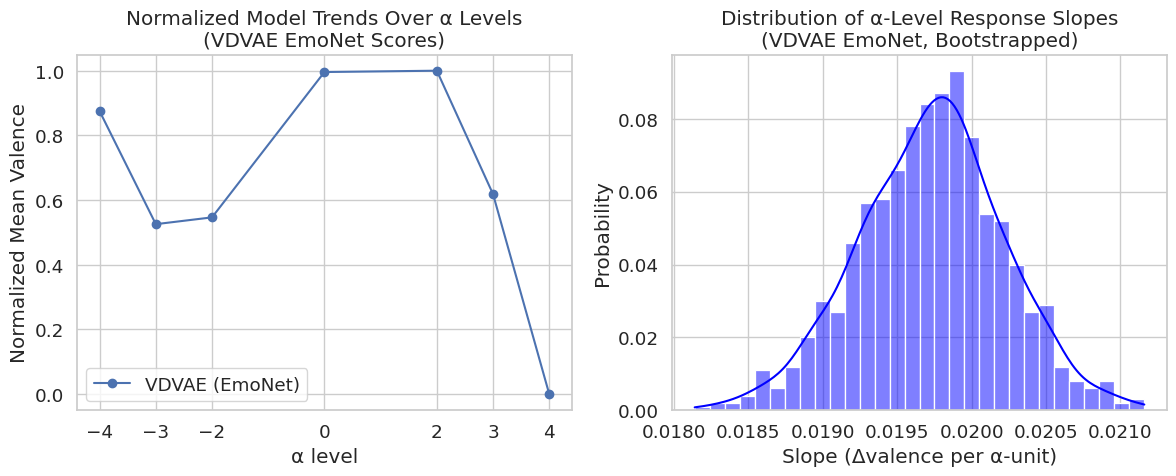

In [24]:
# Cell 1: Imports
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from sklearn.utils import resample

# Cell 2: Load model data
pkl_path = "/home/rothermm/brain-diffuser/results/assessor_scores/subj01/emonet_vdvae_sub01.pkl"
with open(pkl_path, "rb") as f:
    data = pickle.load(f)

# Cell 3: Prepare data
# Extract and sort alpha levels numerically
alpha_levels = sorted(data.keys(), key=lambda x: int(x.split('_')[1]))
alpha_numeric = [int(a.split('_')[1]) for a in alpha_levels]

# Stack valence scores into 2D array: rows = images, cols = alpha levels
valence_matrix = np.column_stack([np.array(data[a]) for a in alpha_levels])

# Build long DataFrame for Panel A
df_model = pd.DataFrame({
    "alpha_level": np.repeat(alpha_numeric, valence_matrix.shape[0]),
    "ValenceRating": valence_matrix.flatten()
})

# Cell 4: Normalize mean valence ratings (Panel A)
mean_ratings = (
    df_model.groupby('alpha_level')['ValenceRating']
    .mean()
    .reset_index()
    .sort_values('alpha_level')
)

# Min-max normalize
min_val, max_val = mean_ratings['ValenceRating'].min(), mean_ratings['ValenceRating'].max()
mean_ratings['NormalizedValence'] = (mean_ratings['ValenceRating'] - min_val) / (max_val - min_val)

# Cell 5: Bootstrap slopes (Panel B)
n_bootstrap = 1000
slopes = []

for i in range(n_bootstrap):
    # Sample images (rows) with replacement
    boot_rows = resample(valence_matrix, replace=True, n_samples=valence_matrix.shape[0])
    
    # Compute mean valence per alpha level for bootstrap sample
    mean_boot = boot_rows.mean(axis=0)
    
    # Fit slope across alpha levels
    slope, _, _, _, _ = linregress(alpha_numeric, mean_boot)
    slopes.append(slope)

# Cell 6: Plotting
sns.set(style="whitegrid", font_scale=1.2)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Panel A: Normalized mean valence ratings
axes[0].plot(
    mean_ratings['alpha_level'],
    mean_ratings['NormalizedValence'],
    marker='o',
    linestyle='-',
    label='VDVAE (EmoNet)'
)
axes[0].set_title("Normalized Model Trends Over α Levels\n(VDVAE EmoNet Scores)")
axes[0].set_xlabel("α level")
axes[0].set_ylabel("Normalized Mean Valence")
axes[0].set_xticks(alpha_numeric)
axes[0].legend()

# Panel B: Bootstrap slope distribution
sns.histplot(slopes, kde=True, color='blue', bins=30, ax=axes[1], stat="probability")
axes[1].set_title("Distribution of α-Level Response Slopes\n(VDVAE EmoNet, Bootstrapped)")
axes[1].set_xlabel("Slope (Δvalence per α-unit)")
axes[1].set_ylabel("Probability")

plt.tight_layout()
plt.show()


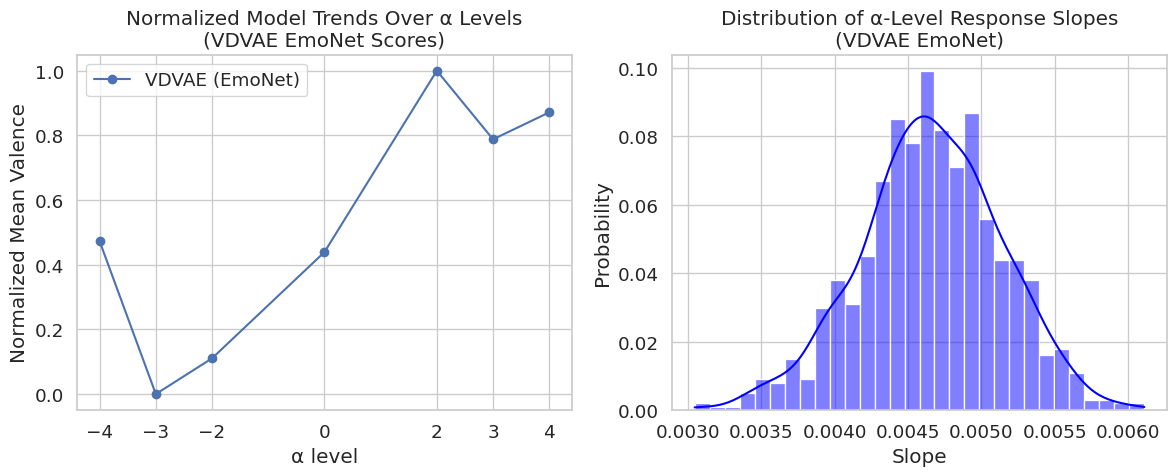

In [21]:
# Cell 1: Imports
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from sklearn.utils import resample

# Cell 2: Load model data
pkl_path = "/home/rothermm/brain-diffuser/results/assessor_scores/subj01/emonet_versatile_sub01.pkl"
with open(pkl_path, "rb") as f:
    data = pickle.load(f)

# Cell 3: Prepare DataFrame
# Extract alpha levels and sort them numerically
alpha_levels = sorted(data.keys(), key=lambda x: int(x.split('_')[1]))
alpha_numeric = [int(a.split('_')[1]) for a in alpha_levels]

# Assuming each `data[alpha_*]` contains an array of valence scores
# (Adjust 'valence' indexing if needed depending on data structure)
valence_scores = [np.array(data[a]) for a in alpha_levels]

# Build a long DataFrame: each row is (alpha_level, score)
import pandas as pd
df_model = pd.DataFrame({
    "alpha_level": np.repeat(alpha_numeric, [len(v) for v in valence_scores]),
    "ValenceRating": np.concatenate(valence_scores)
})

# Cell 4: Normalize mean valence ratings
mean_ratings = (
    df_model.groupby('alpha_level')['ValenceRating']
    .mean()
    .reset_index()
    .sort_values('alpha_level')
)

# Min-max normalize
min_val, max_val = mean_ratings['ValenceRating'].min(), mean_ratings['ValenceRating'].max()
mean_ratings['NormalizedValence'] = (mean_ratings['ValenceRating'] - min_val) / (max_val - min_val)

# Cell 5: Bootstrap slopes
n_bootstrap = 1000
slopes = []

for i in range(n_bootstrap):
    boot_df = resample(df_model, replace=True, n_samples=len(df_model))
    slope, _, _, _, _ = linregress(boot_df['alpha_level'], boot_df['ValenceRating'])
    slopes.append(slope)

# Cell 6: Plotting
sns.set(style="whitegrid", font_scale=1.2)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Panel A: Normalized mean valence ratings
axes[0].plot(
    mean_ratings['alpha_level'],
    mean_ratings['NormalizedValence'],
    marker='o',
    linestyle='-',
    label='VDVAE (EmoNet)'
)
axes[0].set_title("Normalized Model Trends Over α Levels\n(VDVAE EmoNet Scores)")
axes[0].set_xlabel("α level")
axes[0].set_ylabel("Normalized Mean Valence")
axes[0].set_xticks(alpha_numeric)
axes[0].legend()

# Panel B: Bootstrap slope distribution
sns.histplot(slopes, kde=True, color='blue', bins=30, ax=axes[1], stat="probability")
axes[1].set_title("Distribution of α-Level Response Slopes\n(VDVAE EmoNet)")
axes[1].set_xlabel("Slope")
axes[1].set_ylabel("Probability")

plt.tight_layout()
plt.show()
